In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
housing_data = pd.read_csv('housing_data.csv')
housing_data.head()


Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL         65.0     8450   Pave   NaN      Reg   
1           1       SC20       RL         80.0     9600   Pave   NaN      Reg   
2           2       SC60       RL         68.0    11250   Pave   NaN      IR1   
3           3       SC70       RL         60.0     9550   Pave   NaN      IR1   
4           4       SC60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
housing_data.isnull().sum()



Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## Line Plot
* Univariate and Bivariate
#### Used for univariate: analysis of one variable in visualization. Doesnt deal with relationship plots
* takes data, summerize data, pattern analysis, trend analysys
* can be used for numerical and categorical data

#### Used for bivariate: Relationship plot
*

In [7]:
df_numerical = housing_data.select_dtypes(include = ['number'])
# df_numerical.info()

<Axes: >

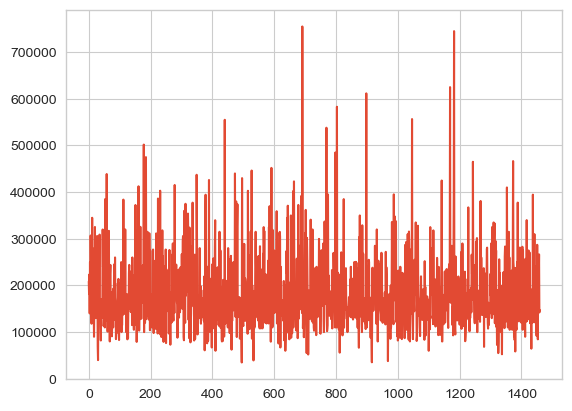

In [24]:
df_numerical['SalePrice'].plot(kind = 'line')

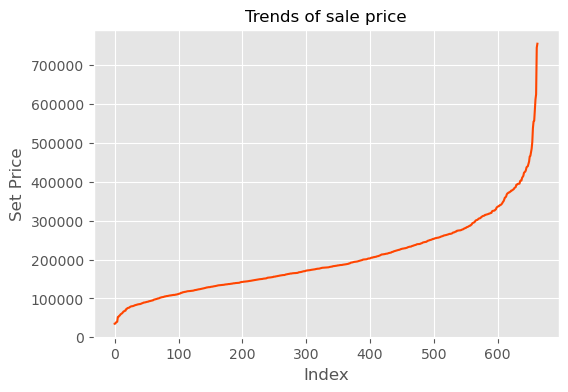

In [9]:
plt.figure(figsize = (6,4))
plt.style.use('ggplot')
plt.plot(df_numerical['SalePrice'].sort_values(ascending = True).unique(),color='orangered')
plt.xlabel('Index')
plt.ylabel('Set Price')
plt.title('Trends of sale price',size = 12)
plt.show()


#### Bar Plot:
* Univariate and Bivariate
* Used with Categorical data
* Used to display counts of unique value


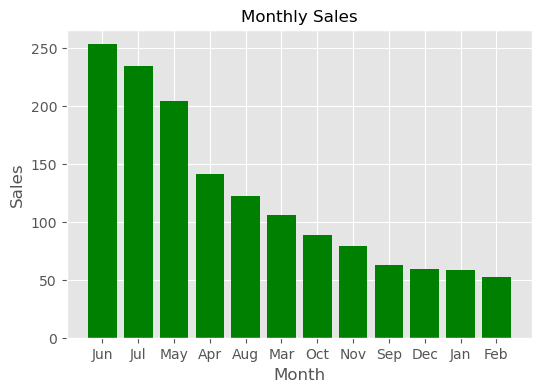

In [10]:
df_categorical = housing_data.select_dtypes(include=['O'])
plt.figure(figsize = (6,4))
plt.bar(x = df_categorical['MoSold'].value_counts().index, height = df_categorical['MoSold'].value_counts().values,color='green')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales',size = 12)
plt.show()

#### methode 2

In [11]:
df_categorical['MoSold'].value_counts()

MoSold
Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: count, dtype: int64

#### Histogram
* Univariate Analysis : Apply on continous data
* Frequency of data in Range
* Study of Spread /  Data Diatribution
  

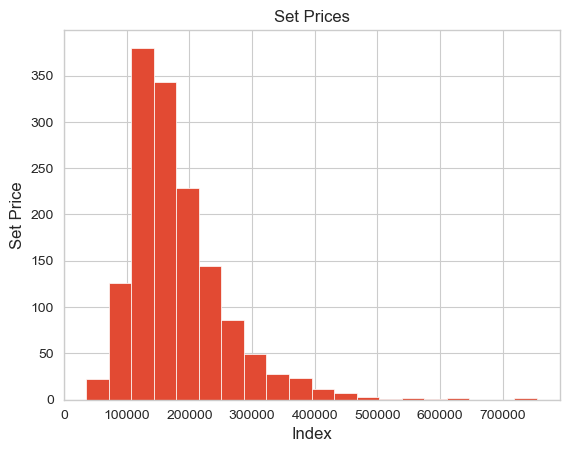

In [12]:
#bins 
sns.set_style('whitegrid')
plt.hist(df_numerical['SalePrice'],bins = 20)
plt.xlabel('Index')
plt.ylabel('Set Price')
plt.title('Set Prices',size = 12)
plt.show()

#### Sub plots
* A plot is splitted into multiple plots

In [13]:
df = housing_data.query("LandSlope == 'Gtl'")
df=['SalePrice']

(array([1., 0., 0., 1., 1., 1., 1., 2., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
        0., 0., 1.]),
 array([ 61000.,  76700.,  92400., 108100., 123800., 139500., 155200.,
        170900., 186600., 202300., 218000., 233700., 249400., 265100.,
        280800., 296500., 312200., 327900., 343600., 359300., 375000.]),
 <BarContainer object of 20 artists>)

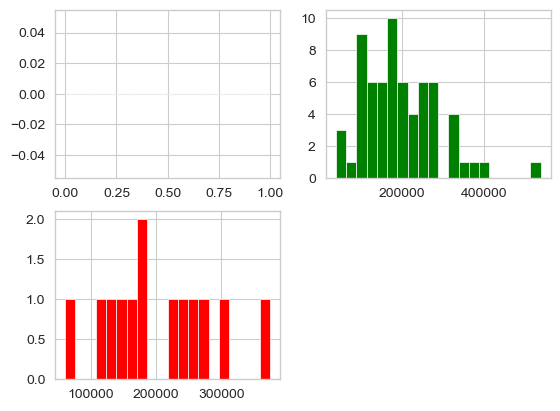

In [14]:

plt.subplot(2,2,1)
plt.hist(housing_data[housing_data['LandSlope']=='Glt']['SalePrice'],bins = 20, color = 'b')
plt.subplot(2,2,2)
plt.hist(housing_data[housing_data['LandSlope']=='Mod']['SalePrice'],bins = 20, color = 'g')
plt.subplot(2,2,3)
plt.hist(housing_data[housing_data['LandSlope']=='Sev']['SalePrice'],bins = 20, color = 'r')


Text(0.5, 1.0, 'Scatter Plot')

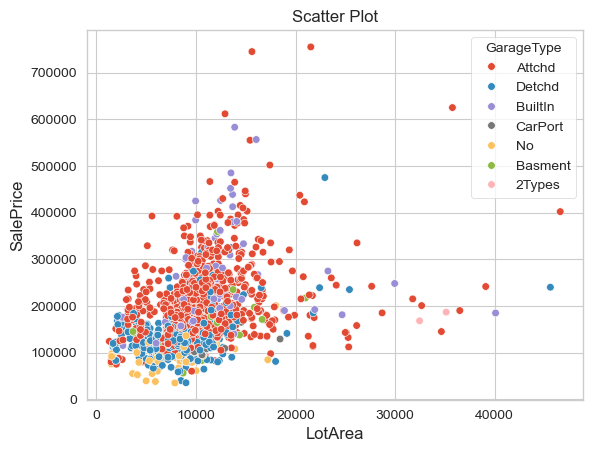

In [15]:

sns.scatterplot(x = df_numerical[df_numerical['LotArea'] <50000]['LotArea'],
            y = df_numerical[df_numerical['LotArea']<50000]['SalePrice'], color='orangered',hue = df_categorical['GarageType'], s=30)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot',size=12)

Text(0.5, 1.0, 'Scatter Plot')

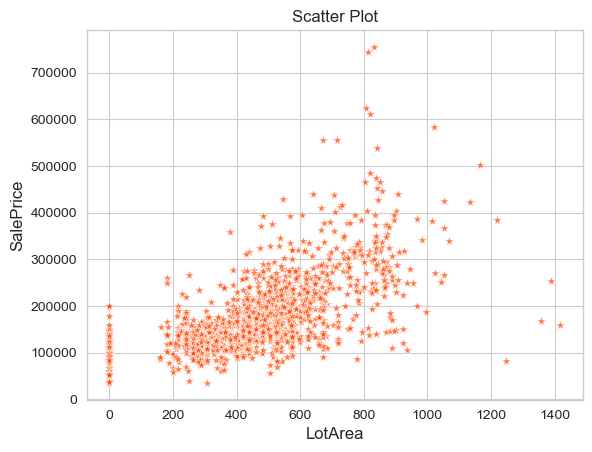

In [16]:
# marker (shape) : used to shange shape of scatter : s ^ < > * + , etc
sns.scatterplot(x = df_numerical['GarageArea'],
            y = df_numerical['SalePrice'], color='orangered', s=50, marker='*', alpha= 0.7)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot',size=12)

#### Pie Chart
* Used for frequency distribution plot

In [17]:
df_categorical['LotConfig'].value_counts()


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

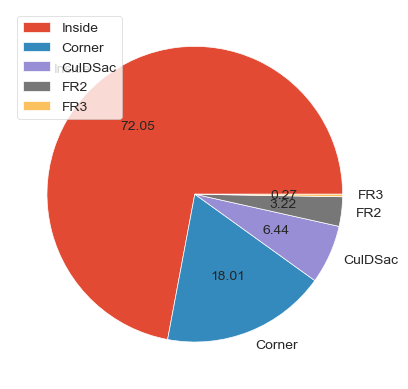

In [18]:
plt.pie(df_categorical['LotConfig'].value_counts(), autopct = '%0.2f', labels = ['Inside','Corner','CulDSac','FR2','FR3'])
plt.legend()

#### Kernel Density Estimate Plot(KDE)
* Displays distribution of continous numerical data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2160\3157637821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'],color='green',hist = True)


<Axes: xlabel='GarageArea', ylabel='Density'>

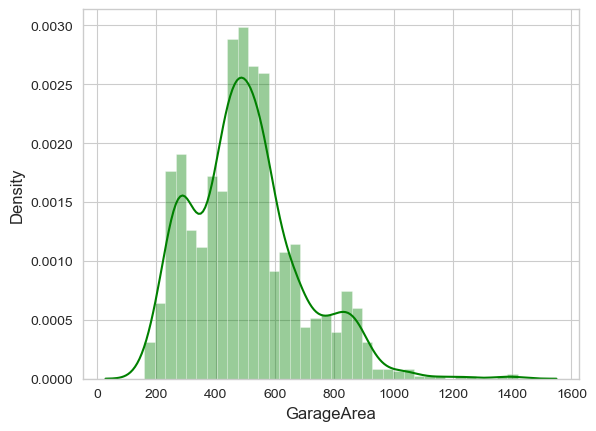

In [21]:
sns.distplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'],color='green',hist = True)

# if dont wnat histogram use {hist=False}

#### Boxplot
* used to represent data distribution in format of min, median, max and outliers
* Skewness (-ve) : left skewed    (+ve) : right skewed    (0) : normal skewed/normal distribution {symmetric}
* Contain 5 data distribution min,Q1,Q2,Q3,max
  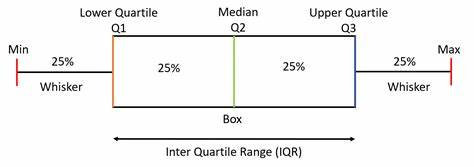

<Axes: xlabel='GarageArea'>

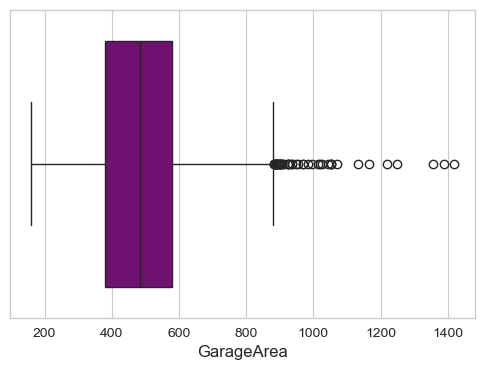

In [29]:
plt.figure(figsize = (6,4))
sns.boxplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], orient = 'h',color = 'purple')

#### Violin plot
* 

<Axes: ylabel='GarageArea'>

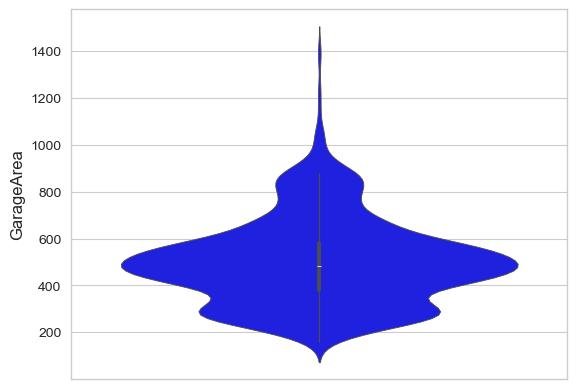

In [35]:
sns.violinplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], color = 'blue')

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

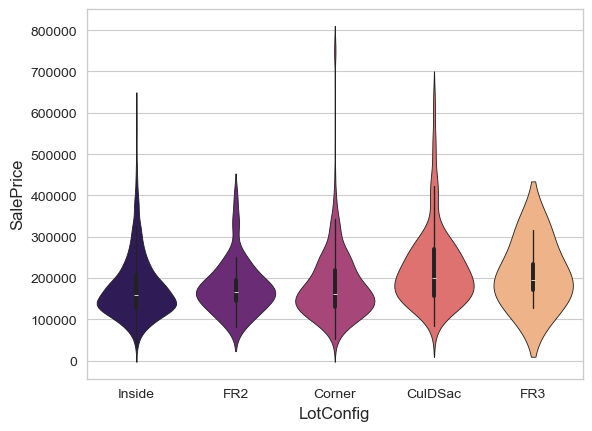

In [45]:
sns.violinplot(x = 'LotConfig', y = 'SalePrice', data = housing_data, hue = 'LotConfig', palette = 'magma')

#### Multi variate plot
* heatmaps

In [53]:
df_numerical.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Unnamed: 0      -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
LotFrontage      0.209624
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

<Axes: >

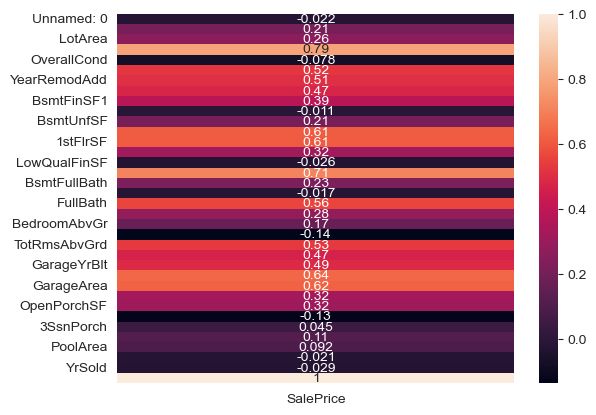

In [56]:
sns.heatmap(df_numerical.corr()[['SalePrice']],annot = True)

<Axes: >

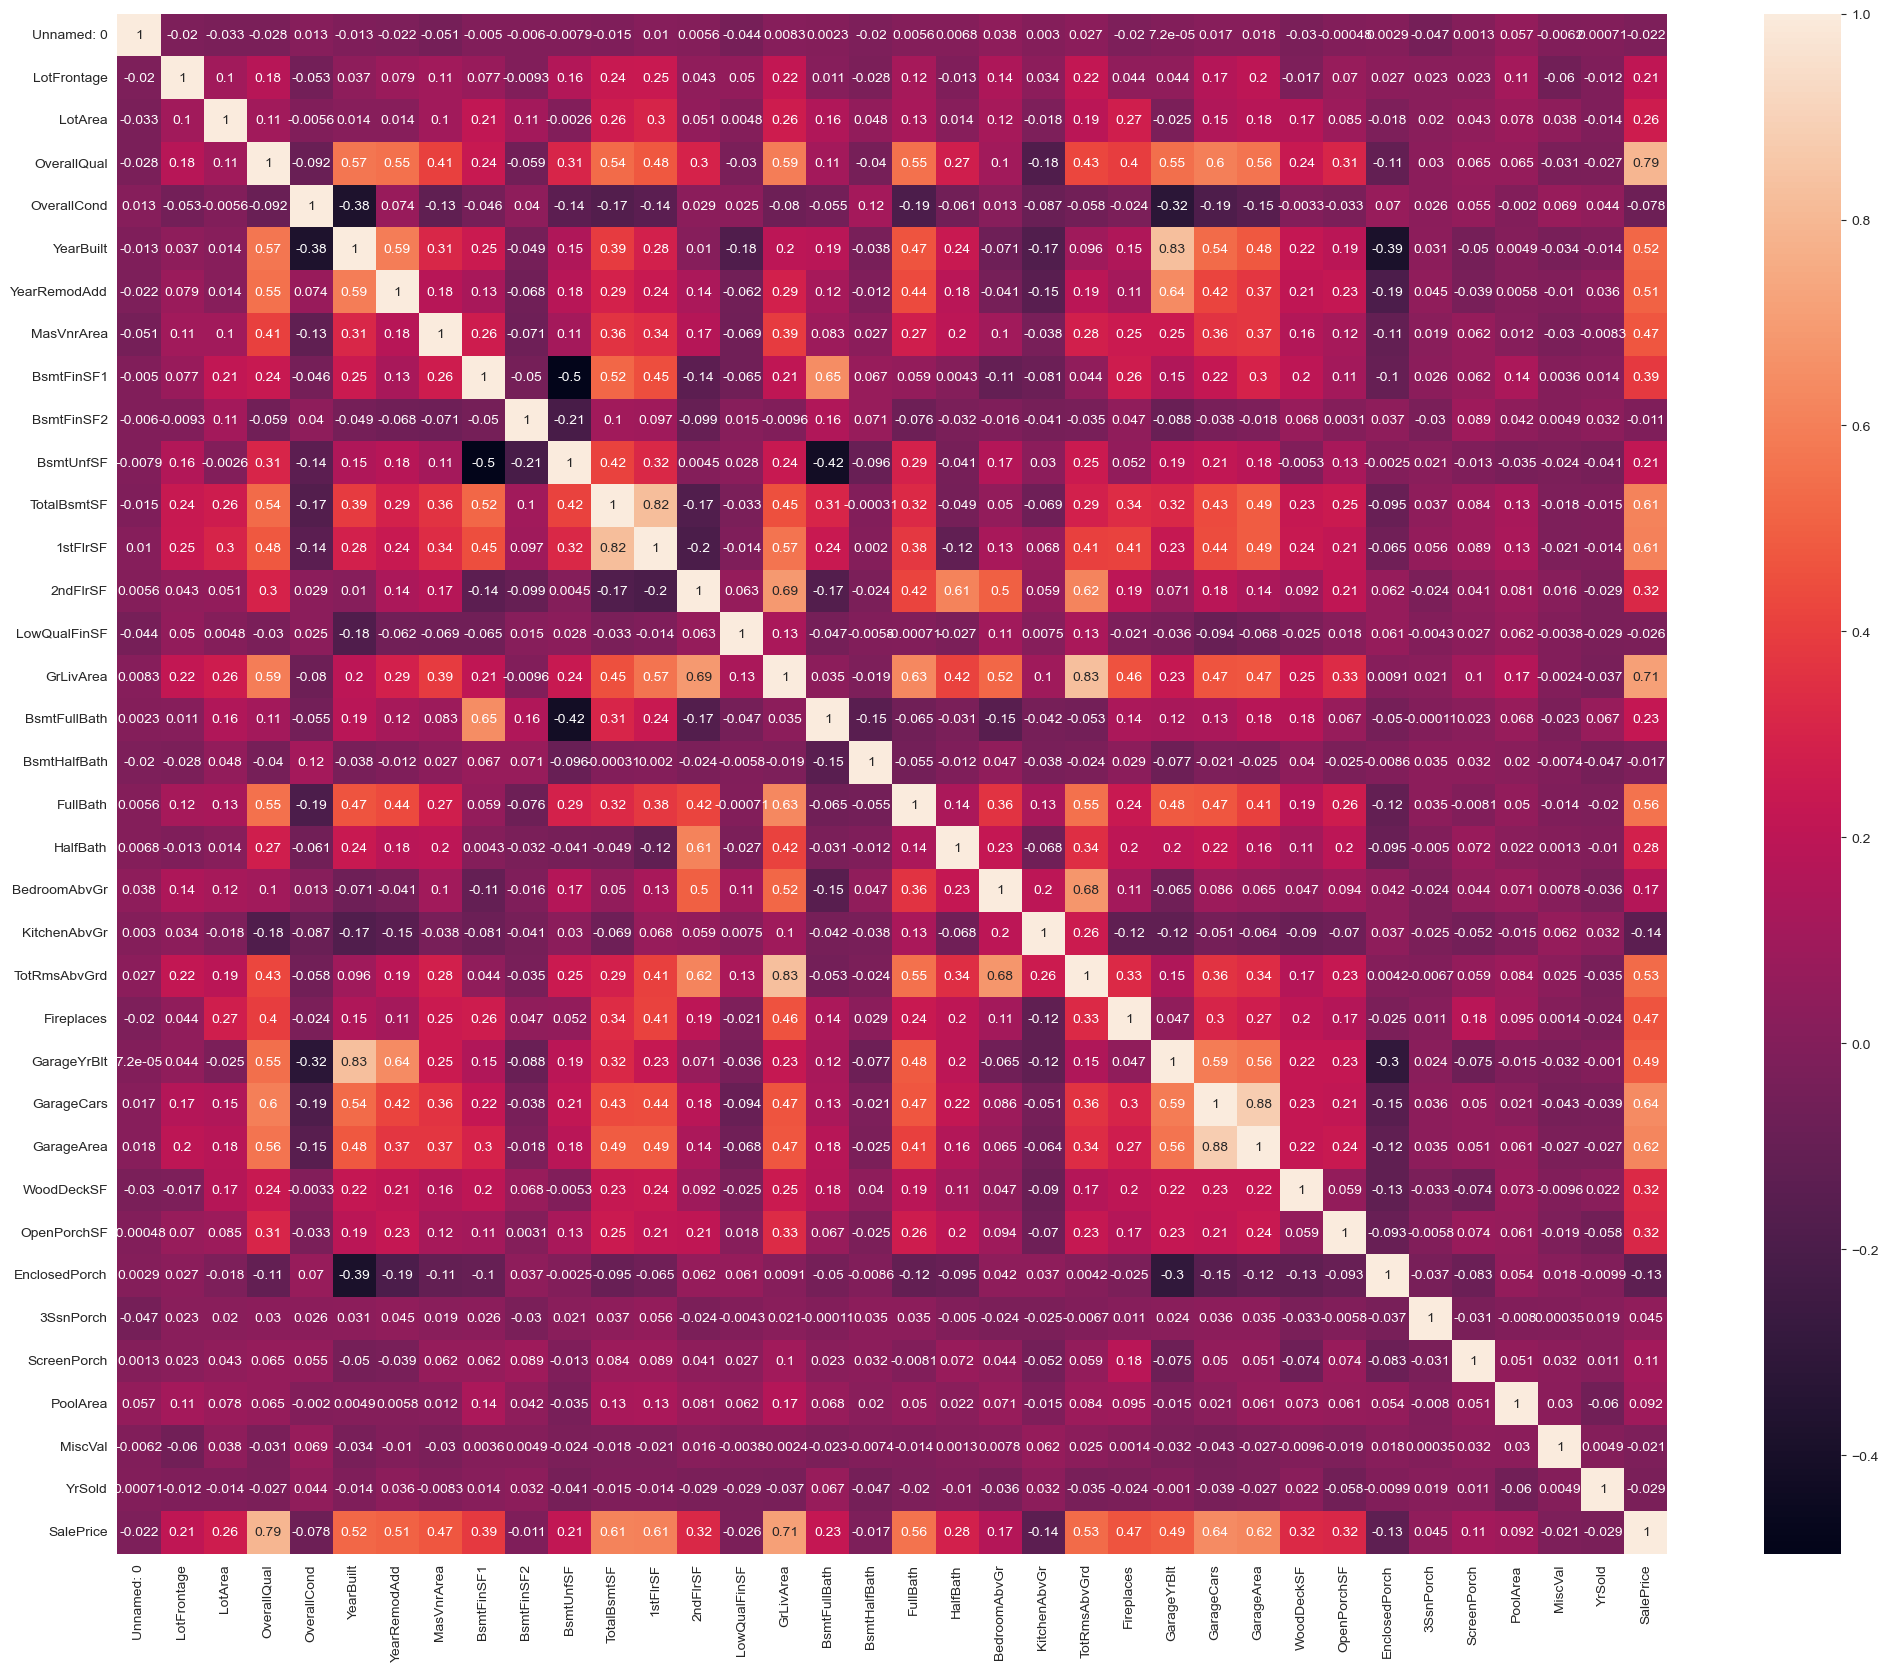

In [57]:
plt.figure(figsize= (25,20))
sns.heatmap(df_numerical.corr(),annot = True)

#### Area Plot

<Axes: >

<Figure size 1500x1000 with 0 Axes>

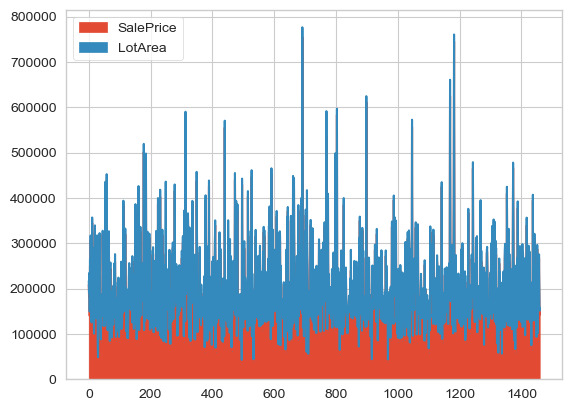

In [66]:
plt.figure(figsize = (15,10))
housing_data[['SalePrice','LotArea']].plot(kind = 'area', stacked = True)